In [473]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit

In [474]:
training_history_df = pd.read_csv('training_history.csv')

In [475]:
training_history_df_sorted = training_history_df.sort_values(by='Measured Stimulus')
training_history_df_sorted

,Trial,Truth,Measured Stimulus,Decision,HP
3363,3364,False,-3.915938,False,5155
583,584,False,-3.778860,False,1697
1075,1076,False,-3.679270,False,2337
1728,1729,False,-3.235401,False,3086
2911,2912,False,-2.858148,False,4602
...,...,...,...,...,...
2650,2651,True,4.602940,True,4288
1895,1896,True,4.679470,True,3309
940,941,True,4.708174,True,2158
623,624,True,4.716495,True,1756


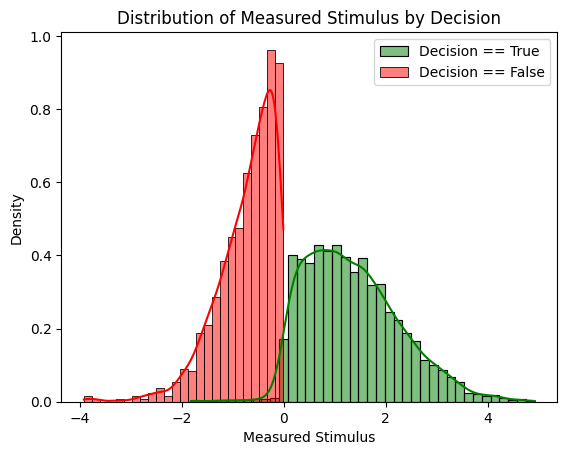

In [476]:
decision_true = training_history_df[training_history_df['Decision'] == True]['Measured Stimulus']
decision_false = training_history_df[training_history_df['Decision'] == False]['Measured Stimulus']

# Plot the distributions with different colors
sns.histplot(decision_true, kde=True, color='green', label='Decision == True', stat='density', common_norm=False)
sns.histplot(decision_false, kde=True, color='red', label='Decision == False', stat='density', common_norm=False)

# Add labels, legend, and show the plot
plt.xlabel('Measured Stimulus')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Measured Stimulus by Decision')
plt.show()

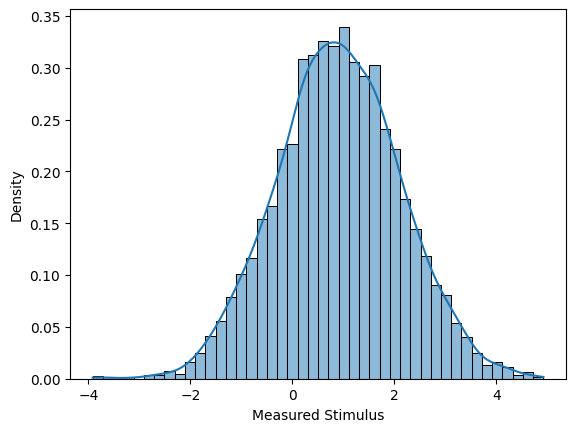

In [477]:
sns.histplot(training_history_df['Measured Stimulus'], kde=True, stat='density')

plt.xlabel('Measured Stimulus')
plt.ylabel('Density')
plt.show()

In [478]:
def generate_data_csv(min_stimulus, max_stimulus, step, n_trial, s_ref, s_ref_std, experiment_name):
    data = []  
    stimulus_std_values = np.arange(0.1, 1, 0.1) 

    for stimulus_std in stimulus_std_values: 
        stimulus_values = np.arange(min_stimulus, max_stimulus + step, step)  
        for stimulus in stimulus_values: 
            for trial in range(n_trial):  
                row = [
                    1 + (stimulus - min_stimulus) // step,
                    s_ref,
                    s_ref_std,
                    stimulus,
                    stimulus_std
                ]
                data.append(row)

    filename = f"{experiment_name}.csv"
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Trial', 'Stimulus 1 Value', 'Stimulus 1 Std', 'Stimulus 2 Value', 'Stimulus 2 Std'])
        writer.writerows(data)
    
    print(f"Data successfully written to {filename}")


In [479]:
experiment_name = "add_bias"
generate_data_csv(
    min_stimulus = -5,
    max_stimulus = 5,
    step = 0.1,
    n_trial = 100,
    s_ref = 0,
    s_ref_std = 0.5,
    experiment_name=experiment_name
)

Data successfully written to add_bias.csv


In [480]:
# add_bias_result = pd.read_csv('experiment_results.csv')

In [481]:
# add_bias_result.to_csv('add_bias_result.csv')

In [482]:
add_bias_result = pd.read_csv('add_bias_result.csv')

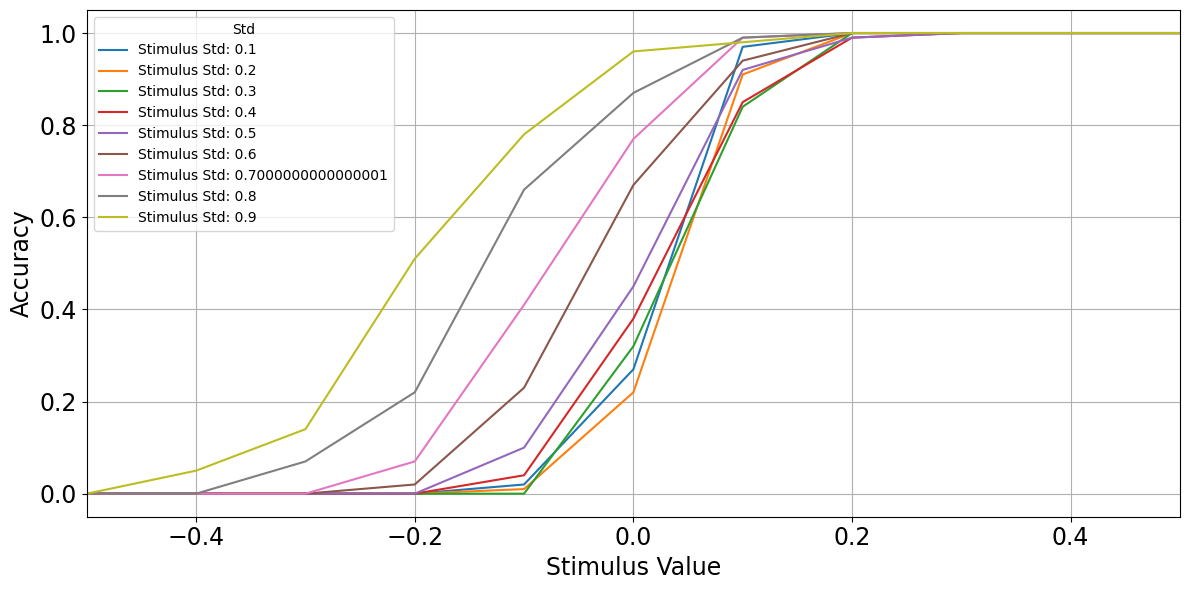

In [483]:
# Calculate Stimulus Difference ('Stimulus 2 Value' - 'Stimulus 1 Value') and include it in the accuracy data frame
accuracy_df = (
    add_bias_result
    .assign(Stimulus_Diff=lambda df: df['Stimulus 2 Value'] - df['Stimulus 1 Value'])  # Compute the difference
    .groupby(['Stimulus 2 Std', 'Stimulus_Diff'])['Comparison Result']
    .apply(lambda x: 1 - x.sum() / len(x))
    .reset_index()
    .rename(columns={'Comparison Result': 'Accuracy'})
)
plt.figure(figsize=(12, 6))

for stimulus_std, grouped_df in accuracy_df.groupby('Stimulus 2 Std'):
    plt.plot(
        grouped_df['Stimulus_Diff'],
        grouped_df['Accuracy'],
        marker= None,
        label=f"Stimulus Std: {stimulus_std}",
        linestyle='-'
    )

plt.xlabel("Stimulus Value", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(title="Std")
plt.grid(True)
plt.tight_layout()
plt.xlim([-0.5,0.5])

plt.show()


In [484]:
def generate_data_csv(min_stimulus, max_stimulus, step, n_trial, s_ref, s_ref_std, experiment_name):
    data = []  
    stimulus_std_values = np.arange(0.1, 1, 0.1)

    for stimulus_std in stimulus_std_values: 
        stimulus_values = np.arange(min_stimulus, max_stimulus + step, step)  
        for stimulus in stimulus_values: 
            for trial in range(n_trial):  
                row = [
                    1 + (stimulus - min_stimulus) // step,
                    s_ref,
                    stimulus_std,
                    stimulus,
                    stimulus_std
                ]
                data.append(row)

    filename = f"{experiment_name}.csv"
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Trial', 'Stimulus 1 Value', 'Stimulus 1 Std', 'Stimulus 2 Value', 'Stimulus 2 Std'])
        writer.writerows(data)
    
    print(f"Data successfully written to {filename}")


In [485]:
experiment_name = "decreasing_sensitivity"
generate_data_csv(
    min_stimulus = -5,
    max_stimulus = 5,
    step = 0.1,
    n_trial = 100,
    s_ref = 0,
    s_ref_std = 0.5,
    experiment_name=experiment_name
)

Data successfully written to decreasing_sensitivity.csv


In [486]:
# decreasing_sensitivity_result = pd.read_csv('experiment_results.csv')


In [487]:
# decreasing_sensitivity_result.to_csv('decreasing_sensitivity_result.csv')

In [488]:
decreasing_sensitivity_result = pd.read_csv('decreasing_sensitivity_result.csv')

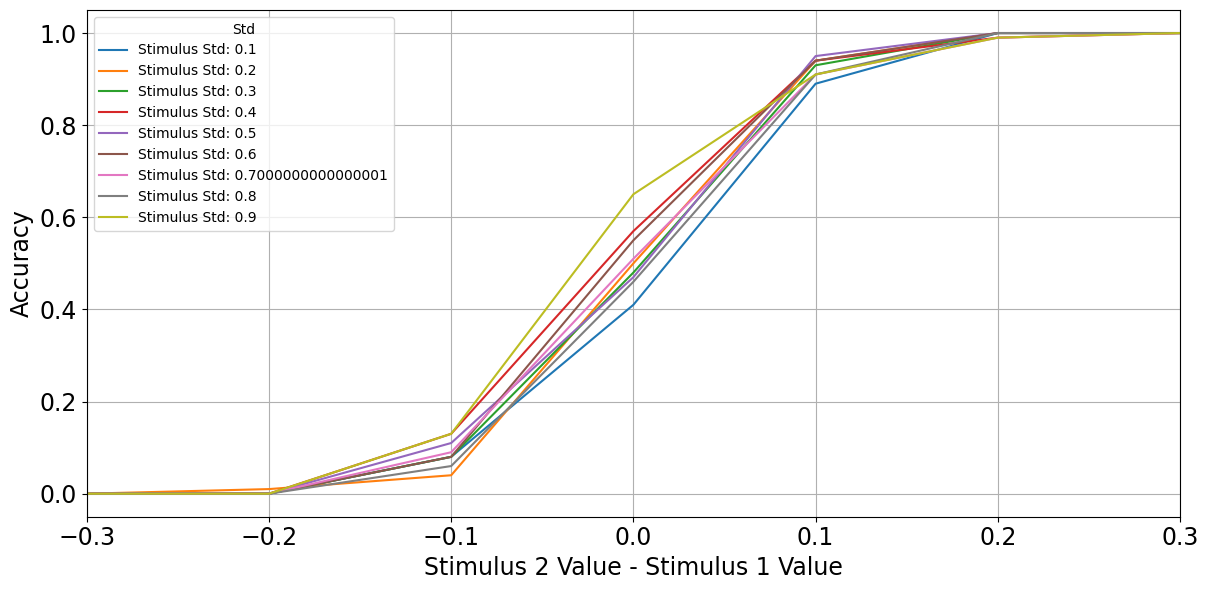

In [489]:
# Calculate Stimulus Difference ('Stimulus 2 Value' - 'Stimulus 1 Value') and include it in the accuracy data frame
accuracy_df = (
    decreasing_sensitivity_result
    .assign(Stimulus_Diff=lambda df: df['Stimulus 2 Value'] - df['Stimulus 1 Value'])  # Compute the difference
    .groupby(['Stimulus 2 Std', 'Stimulus_Diff'])['Comparison Result']
    .apply(lambda x: 1 - x.sum() / len(x))
    .reset_index()
    .rename(columns={'Comparison Result': 'Accuracy'})
)

plt.figure(figsize=(12, 6))

# Plot using the calculated 'Stimulus_Diff' as x-axis
for stimulus_std, grouped_df in accuracy_df.groupby('Stimulus 2 Std'):
    plt.plot(
        grouped_df['Stimulus_Diff'],  # Use Stimulus Difference here
        grouped_df['Accuracy'],
        marker=None,
        label=f"Stimulus Std: {stimulus_std}",
        linestyle='-'
    )

# Update x-label to indicate the new x-axis
plt.xlabel("Stimulus 2 Value - Stimulus 1 Value", fontsize=17)
plt.ylabel("Accuracy", fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(title="Std")
plt.grid(True)
plt.tight_layout()
plt.xlim([-0.3, 0.3])

plt.show()


C:\Users\aslan\AppData\Local\Temp\ipykernel_14300\1270293761.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(sigmoid, x_data, y_data, p0=initial_guess, maxfev=10000)


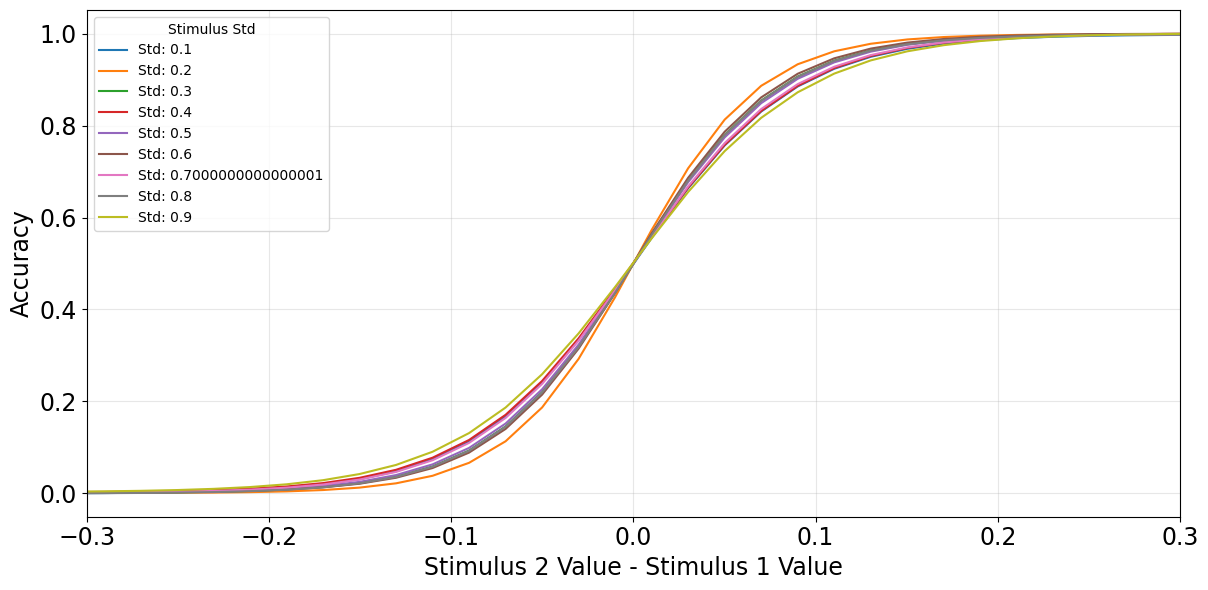

In [490]:
def sigmoid(x, a, b, c, d):
    """
    General sigmoid function:
    y = a / (1 + exp(-c * (x - d))) + b
    """
    return a / (1.0 + np.exp(-c * (x - d))) + b

plt.figure(figsize=(12, 6))

for stimulus_std, grouped_df in accuracy_df.groupby('Stimulus 2 Std'):
    x_data = grouped_df['Stimulus_Diff'].values  # Use 'Stimulus_Diff' instead of 'Stimulus 2 Value'
    y_data = grouped_df['Accuracy'].values

    initial_guess = [1.0, 0.0, 10.0, np.median(x_data)]  # Adjust growth rate 'c' for steep curves
    popt, _ = curve_fit(sigmoid, x_data, y_data, p0=initial_guess, maxfev=10000)
    
    x_smooth = np.linspace(min(x_data), max(x_data), 500)  # Increased to 500 points for smoothness
    
    y_smooth = sigmoid(x_smooth, *popt)
    
    plt.plot(
        x_smooth, y_smooth,
        linestyle='-',  # Line style for fitted sigmoid curve
        label=f"Std: {stimulus_std}"
    )

plt.xlabel("Stimulus 2 Value - Stimulus 1 Value", fontsize=17)  # Reflect new axis meaning
plt.ylabel("Accuracy", fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(title="Stimulus Std", fontsize=10)
plt.grid(True, alpha=0.3)  # Slight transparency for gridlines
plt.tight_layout()
plt.xlim([-0.3, 0.3])  # Adjust x-axis limits based on your data range

plt.show()


In [491]:
grouped_df

,Stimulus 2 Std,Stimulus_Diff,Accuracy
808,0.9,-5.0,0.0
809,0.9,-4.9,0.0
810,0.9,-4.8,0.0
811,0.9,-4.7,0.0
812,0.9,-4.6,0.0
...,...,...,...
904,0.9,4.6,1.0
905,0.9,4.7,1.0
906,0.9,4.8,1.0
907,0.9,4.9,1.0
